# Assignment - 1

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [2]:
df = pd.read_csv("income_tr.csv") #Reading the income_tr csv file into a dataframe df
df.head()

,ID,age,workclass,fnlwgt,education,education_cat,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hour_per_week,native_country,class
0,9364,38,Private,197077,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K
1,25668,31,Private,101761,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,51,United-States,<=50K
2,13316,26,Private,152855,HS-grad,9,Never-married,Exec-managerial,Own-child,Other,Female,0,0,40,Mexico,<=50K
3,28750,50,Self-emp-not-inc,99894,5th-6th,3,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Female,0,0,15,United-States,<=50K
4,30619,35,Private,412379,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [3]:
df.drop("ID",axis = 1, inplace=True)
df.describe() 

,age,fnlwgt,education_cat,capital_gain,capital_loss,hour_per_week
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,38.388462,187200.003846,10.057692,1065.994231,68.915385,39.575000
std,13.911469,100037.914197,2.634538,6822.672989,373.962942,12.202615
min,17.000000,26880.000000,1.000000,0.000000,0.000000,2.000000
25%,27.000000,116385.500000,9.000000,0.000000,0.000000,38.000000
50%,36.000000,176939.000000,10.000000,0.000000,0.000000,40.000000
75%,47.250000,237372.750000,12.000000,0.000000,0.000000,42.000000
max,82.000000,632613.000000,16.000000,99999.000000,4356.000000,99.000000


## Exploratory Data Analysis

We will perform all different types of analysis on data which include:
1. Doing bar plots and histograms based on the type of attribute.
2. Counting the categories in each dataset.
3. Looking at the missing values and imputing them with values that seem fit.
4. Making assumptions for calculating the proximity measures on these attributes.

## Data Visualization

a. Instead of plotting the graphs independently for each variale, we will plot the graphs all in a single figure.
b. We will plot barplots and histograms based on the type of data.

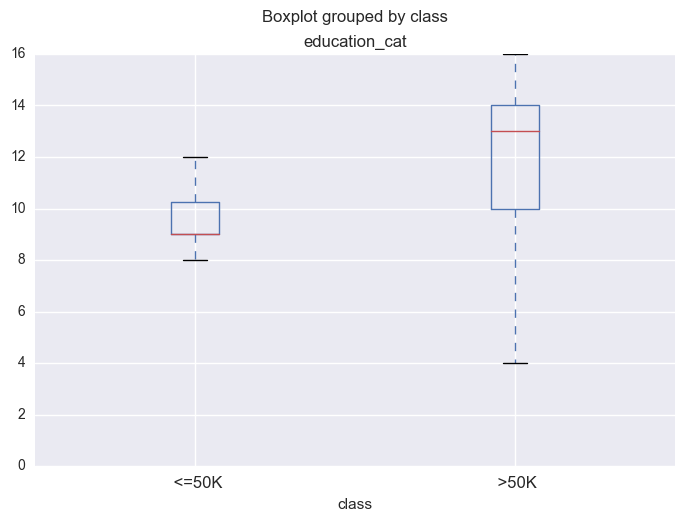

In [4]:
df.boxplot("education_cat", by = "class")

* People with highest education tend to receive salary more than 50K.

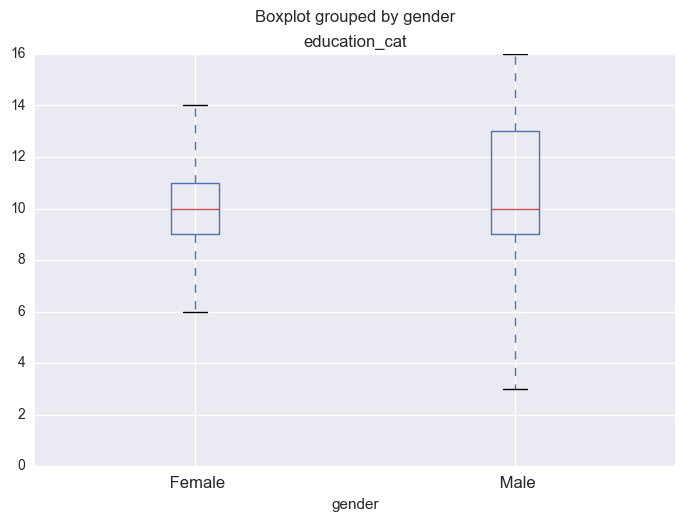

In [5]:
df.boxplot("education_cat", by = "gender")

* While there is equal spread in between education grade in Females, the highest education i.e. Doctorate. 

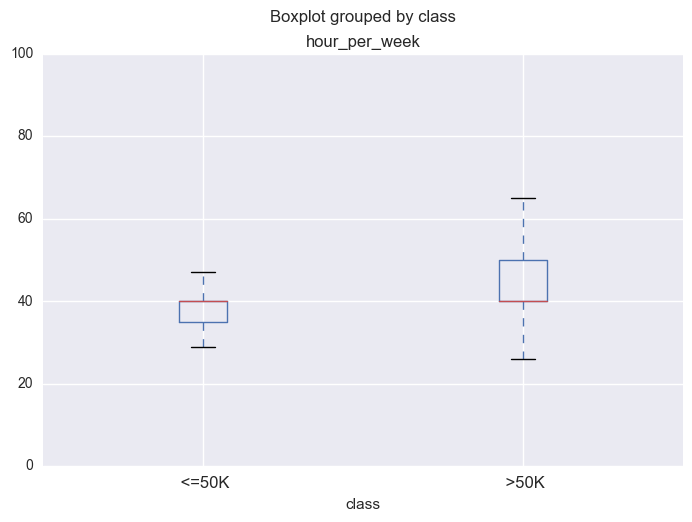

In [6]:
df.boxplot("hour_per_week", by = "class")

* Hours per week surely has an important role in predicting the salary. i.e. below or above 50K.

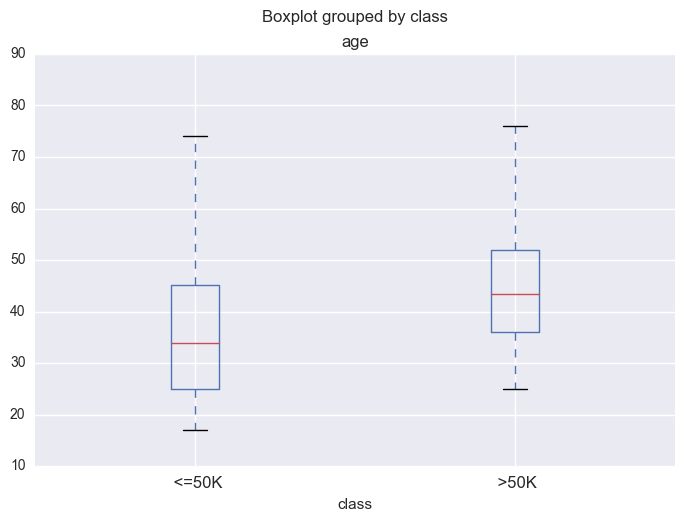

In [7]:
df.boxplot("age", by = "class")

* Although there is not much information available from this plot, it seems people get pay above 50k only after a certain age. 

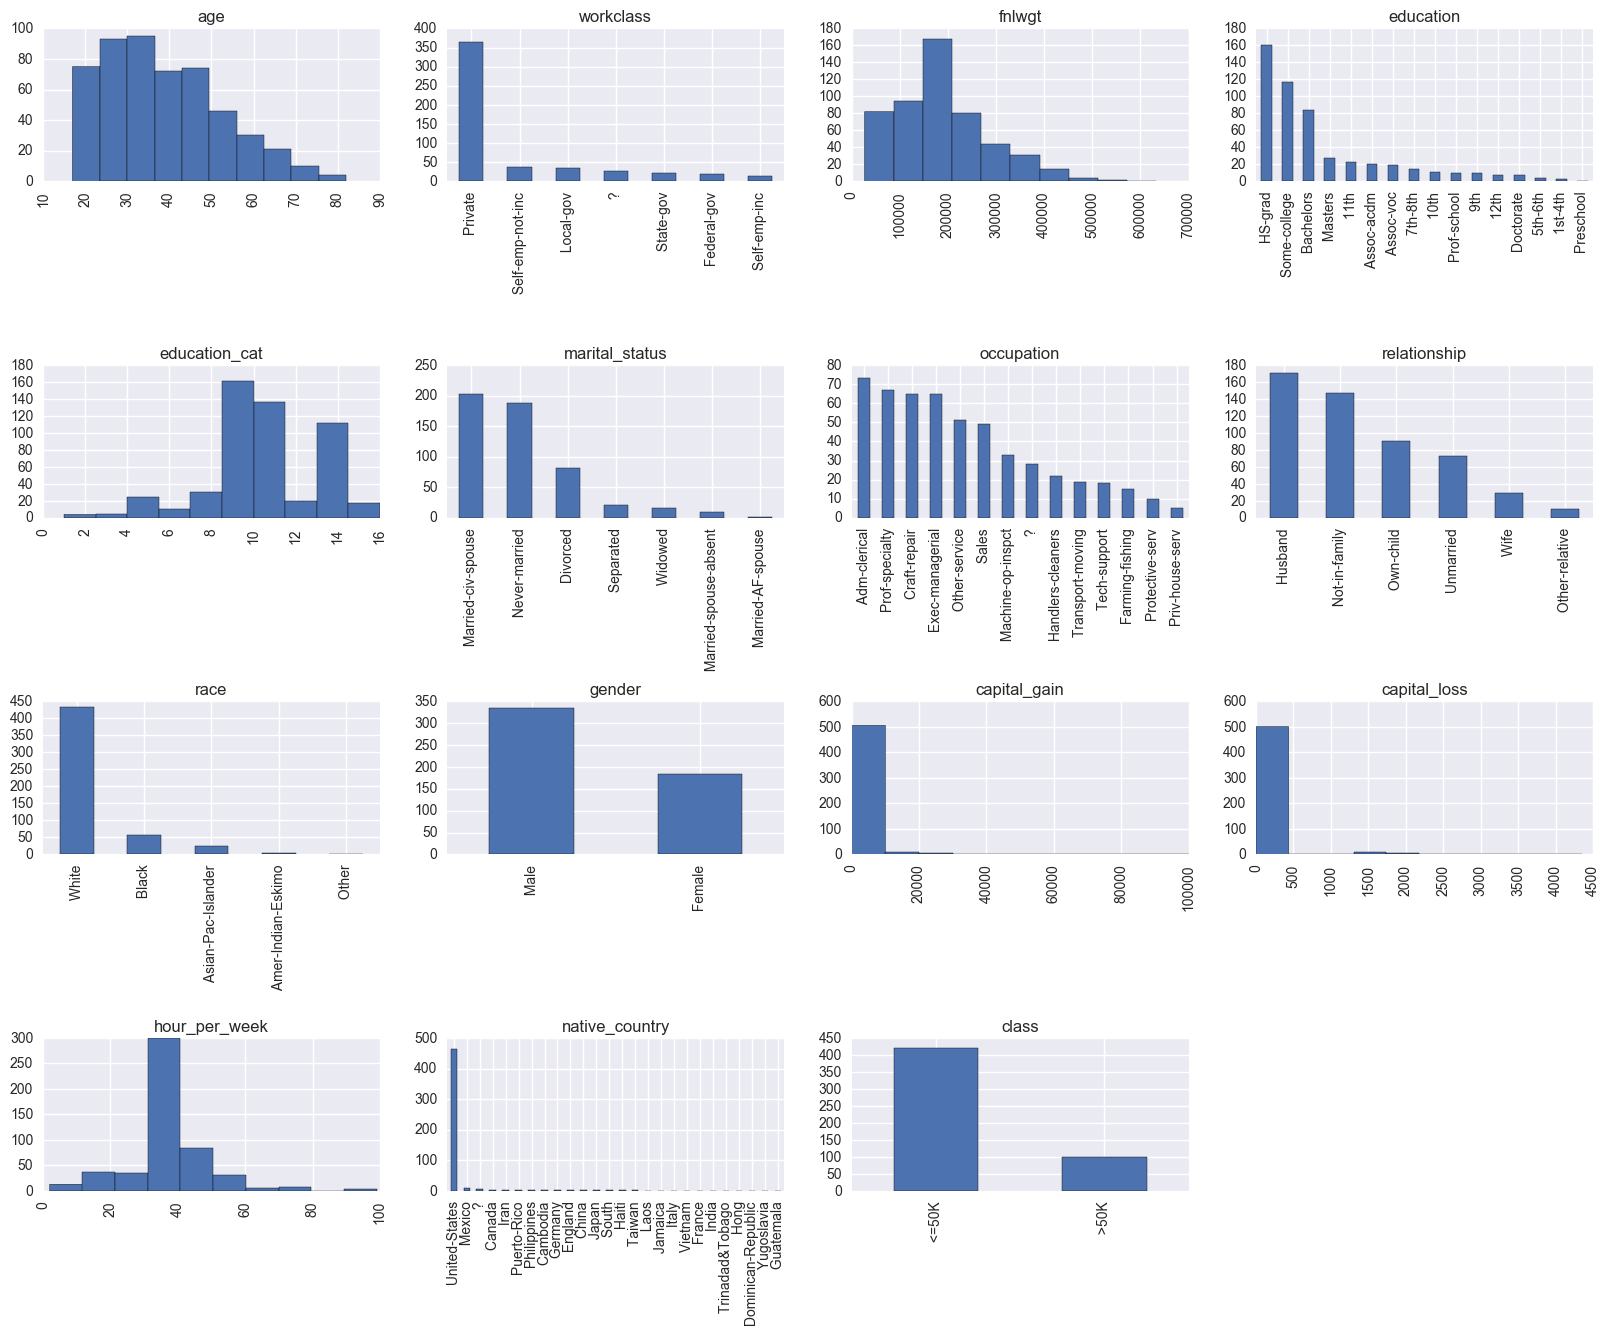

In [8]:
import math
fig = plt.figure(figsize=(20,15))  #Creating a new figure with the mentioned figure size
cols = 4         # No of columns to display the charts
rows = 4         # No of rows to display the charts. These numbers are chosen as we have 16 attributes
                 # Alternatively, *rows = math.ceil(float(df.shape[1]) / cols)* 
                 # can be used when there are indefinete number of attributes.

for i, column in enumerate(df.columns):
    ax = fig.add_subplot(rows, cols, i+1)      #Adds a subplot in the i+1 th position
    ax.set_title(column)
    if df.dtypes[column] == np.object:         #For categorical attributes.
        df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df[column].hist(axes=ax)               #For conitnous attributes
        plt.xticks(rotation="vertical")

plt.subplots_adjust(hspace=1.2, wspace=0.2)    # To adjust the plots and their labels


## Exploring the Data:
These charts give information about all the attributes.
1.  Beginning with the first plot, number of people working in a particular age group is decreasing.
2.  In the workclass graph, we can see a value marked with "?" in the workclass graph. This might be a missing value. Many of       the workclass records are Private.
3.  In the education plot, we can see that many people have their highest education as HS-grad.
4.  In education_cat, "9" is the most frequent record which seems same as the frequency of HS-grad in education. Seems like         education_cat is just a numeric to the education. We can confirm it with value_counts function.
5.  Marital_status and relationship seem to be related as Married implies the person is a husband or wife. Never married relates     to unmarried.
6.  There seems to be missing values in occupation marked with "?". And their frequency is somewhat similar to the missing           values in workclass. They might be missing values of the same record. We can validate this.
7.  In the race category, majority of the observations are whites.
8.  There are around 340 Males which constitute 65% of the data.
9.  There are a lot of zeroes in the attributes capital_gain and capital_loss.
10. From the hour_per_week graph, it seems there are a lot of observations in the bin 30-40. While calculating the similarities, 
    we can treat hour_per_week as coninuous or we can categorize it by implying 0-20 as part time, 20-40 as full time and rest       as over time.
11. From the native_country, most frequent outcome is United-States and there are missing values which are represented as "?".       In addition to that, we can also infer that whites belong to United-States.

In [9]:
df["education"].value_counts()

 HS-grad         161
 Some-college    117
 Bachelors        84
 Masters          28
 11th             23
 Assoc-acdm       20
 Assoc-voc        19
 7th-8th          14
 10th             11
 Prof-school      10
 9th              10
 12th              8
 Doctorate         7
 5th-6th           4
 1st-4th           3
 Preschool         1
Name: education, dtype: int64

In [10]:
df["education_cat"].value_counts()

9     161
10    117
13     84
14     28
7      23
12     20
11     19
4      14
6      11
15     10
5      10
8       8
16      7
3       4
2       3
1       1
Name: education_cat, dtype: int64

* We can confirm that they both are the same and drop the education attribute.

In [11]:
df.drop("education", axis = 1, inplace = True)

In [12]:
# To check the number of categories
df["marital_status"].value_counts()

 Married-civ-spouse       202
 Never-married            188
 Divorced                  82
 Separated                 21
 Widowed                   16
 Married-spouse-absent     10
 Married-AF-spouse          1
Name: marital_status, dtype: int64

In [13]:
df["relationship"].value_counts()

 Husband           170
 Not-in-family     147
 Own-child          90
 Unmarried          73
 Wife               29
 Other-relative     11
Name: relationship, dtype: int64

* As you can see the sum of wife and husban is almost equal to Married-civ-spouse. We can say that these two variables are somewhat related.

In [14]:
df["gender"].value_counts()

 Male      335
 Female    185
Name: gender, dtype: int64

* Majority of the observations are male.

In [15]:
df["race"].value_counts()

 White                 433
 Black                  56
 Asian-Pac-Islander     24
 Amer-Indian-Eskimo      5
 Other                   2
Name: race, dtype: int64

## Missing Values:

* Exploring further into the attributes workclass, occupation and native_country

In [16]:
# Exploring the missing values in workclass
df["workclass"].value_counts()

 Private             365
 Self-emp-not-inc     38
 Local-gov            34
 ?                    28
 State-gov            23
 Federal-gov          18
 Self-emp-inc         14
Name: workclass, dtype: int64

* As we can see there are 28 missing values.
* Now, exploring the missing values in occupation.

In [17]:
df["occupation"].value_counts()

 Adm-clerical         73
 Prof-specialty       67
 Craft-repair         65
 Exec-managerial      65
 Other-service        51
 Sales                49
 Machine-op-inspct    33
 ?                    28
 Handlers-cleaners    22
 Transport-moving     19
 Tech-support         18
 Farming-fishing      15
 Protective-serv      10
 Priv-house-serv       5
Name: occupation, dtype: int64

* In this attribute, there are again 28 records missing. Probably the missing values are inside the same records. We can simply check this by accessing those records.

In [18]:
df[df["occupation"]==" ?"].index == df[df["workclass"] == " ?"].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

* As you can see missing values in both the attributes belong to the same records. Maybe this implies it is a an occupation which could not be enclosed or they might be unemployed. So we will just replace the values with a seperate category. We can give workclass as "X"(No proper meaning, only for the sake of categorizing the missing value) and "Job_X" for the occupation.

In [19]:
df["occupation"].replace(to_replace ="\?" , value = "Job_X", inplace = True, regex = True)
df["workclass"].replace(to_replace="\?", value = "X", inplace = True, regex=True)

Checking the columns once again to verify our code.

In [20]:
df["workclass"].value_counts()

 Private             365
 Self-emp-not-inc     38
 Local-gov            34
 X                    28
 State-gov            23
 Federal-gov          18
 Self-emp-inc         14
Name: workclass, dtype: int64

In [21]:
df["occupation"].value_counts()

 Adm-clerical         73
 Prof-specialty       67
 Craft-repair         65
 Exec-managerial      65
 Other-service        51
 Sales                49
 Machine-op-inspct    33
 Job_X                28
 Handlers-cleaners    22
 Transport-moving     19
 Tech-support         18
 Farming-fishing      15
 Protective-serv      10
 Priv-house-serv       5
Name: occupation, dtype: int64

* Both of the missing values are replaced.

* Let us take a look at the native_country attribute.

In [22]:
df["native_country"].value_counts()

 United-States         463
 Mexico                 10
 ?                       6
 Canada                  4
 Iran                    4
 Puerto-Rico             4
 Philippines             2
 Cambodia                2
 Germany                 2
 England                 2
 China                   2
 Japan                   2
 South                   2
 Haiti                   2
 Taiwan                  2
 Laos                    1
 Jamaica                 1
 Italy                   1
 Vietnam                 1
 France                  1
 India                   1
 Trinadad&Tobago         1
 Hong                    1
 Dominican-Republic      1
 Yugoslavia              1
 Guatemala               1
Name: native_country, dtype: int64

* Since there are only 6 missing values, we can simply impute the most frequent value into these missing values. The most frequent one is the united States.

In [23]:
df["native_country"].replace(to_replace = "\?", value = "United-States", inplace = True, regex = True)

In [24]:
df["native_country"].value_counts()

 United-States         469
 Mexico                 10
 Canada                  4
 Puerto-Rico             4
 Iran                    4
 Cambodia                2
 Germany                 2
 England                 2
 China                   2
 South                   2
 Japan                   2
 Haiti                   2
 Taiwan                  2
 Philippines             2
 Jamaica                 1
 Laos                    1
 Guatemala               1
 France                  1
 Italy                   1
 Vietnam                 1
 India                   1
 Trinadad&Tobago         1
 Hong                    1
 Dominican-Republic      1
 Yugoslavia              1
Name: native_country, dtype: int64

* As you can see, the missing values are merged into United-States. 

## Preprocessing Attributes:

* As we are now done dealing with the missing values, we will now decide how to deal with the attributes to calculate the proximity measure.

* Continuous attributes:
    * We have 5 continuous attributes age, fnlwgt, capital_gain, capital_loss.
    * Capital_gain and capital_loss have a lot of zeroes in the data. We cannot use a distance measure to calculate the               similarities between them as 0-0 match does not mean anything. Hence, we have decided to label the records in capital_gain       and capital_loss as 0 for 0 and 1 for any other number. This will help us perform jaccard similarity on this data set as         it can be treated as a binary vector.
    * To calculate distances between age, fnlwgt and hour_per_week we will have to scale the attributes. The feature scaling is       done to make the assumption that all the features has the equal opportunity to influence the weight, which more really           reflects the knowledge you know about the data. Therefore, we will scale these attributes in between 0 to 1. We can also         normalize the data, but for the sake of simplicity we are only scaling the data to 0 to 1 for all the three attributes.         Once we are done with the scaling, we calculated distance using Euclidian distance measure with L2 norm.
* Nominal Attributes: 
    * Most of the attributes in this data set are nominal.
    * For nominal attributes we simply use the similarity measure of s = 1 if both the records are equal, s = 0 if they are not       equal
    * So the nominal attributes in the data are workclass, occupation, marital_status, gender, race, native_country,                   relationship. We will just use this measure for all these attributes.
* Ordinal Attributes:
    * There is only one ordinal attribute in this dataset and that is education_cat. education and education_cat both represent same data and we will drop education attribute as it is not useful for calculating the similarities. For ordinal data, we will map the data to 0 to 1 and then calculate the difference of these attributes. Similiarity will be 1 - d.



## Proximity Measures for attributes:
We will discuss about the different similarity or distance measures used for different attributes.

### Continuous attributes: 
The continuous attributes that are in the data set are age, fnlwgt, hour_per_week. We will standadize the data using standard deviation scaling function. We can calculate the distances using Minkowski distance for n = 3 and L2 norm.

Dissimilarity: d = minkowski with norm 2, similairty: s = 1/e^d. As the distance increases, e^d increases and the similarity decreases.

### Ordinal Attributes:

Dissimilarity d = |x-y|/(n-1) and similarity s = 1 - d.

### Nominal Attributes:
The nominal attributes in the data are workclass, education, occupation, marital_status, relationship, race, gender, native_country.

Dissimilarity d = 0 if x = y, or d = 1 if x != y, 
similarity s = 1 if x = y, or s = 0 if x != y.

### Scaling the data:    
* We will scale the attributes, hour_per_week, age and fnlwgt in between 0 to 1. 

In [25]:
df["age"] = df[["age"]].apply(lambda x : (x - np.min(x))/(np.max(x) - np.min(x)))
df["fnlwgt"] = df[["fnlwgt"]].apply(lambda x : (x - np.min(x)) / (np.max(x) - np.min(x)))
df["hour_per_week"] = df[["hour_per_week"]].apply(lambda x : (x - np.min(x)) / (np.max(x)-np.min(x)))

In [26]:
# To verify the data:
df.head()

,age,workclass,fnlwgt,education_cat,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hour_per_week,native_country,class
0,0.323077,Private,0.280977,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,0.391753,United-States,<=50K
1,0.215385,Private,0.123620,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,0.505155,United-States,<=50K
2,0.138462,Private,0.207971,9,Never-married,Exec-managerial,Own-child,Other,Female,0,0,0.391753,Mexico,<=50K
3,0.507692,Self-emp-not-inc,0.120538,3,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Female,0,0,0.134021,United-States,<=50K
4,0.276923,Private,0.636417,9,Never-married,Other-service,Not-in-family,White,Female,0,0,0.391753,United-States,<=50K


* As we can see the values in the continuous attributes are less than 1. Now we can calculate the euclidian distance on these attributes.
* We will create a different data frame just for the continuous attributes and apply the function on this dataframe.

In [27]:
df_euc = df[["age","fnlwgt","hour_per_week"]]
df_euc.head()

,age,fnlwgt,hour_per_week
0,0.323077,0.280977,0.391753
1,0.215385,0.123620,0.505155
2,0.138462,0.207971,0.391753
3,0.507692,0.120538,0.134021
4,0.276923,0.636417,0.391753


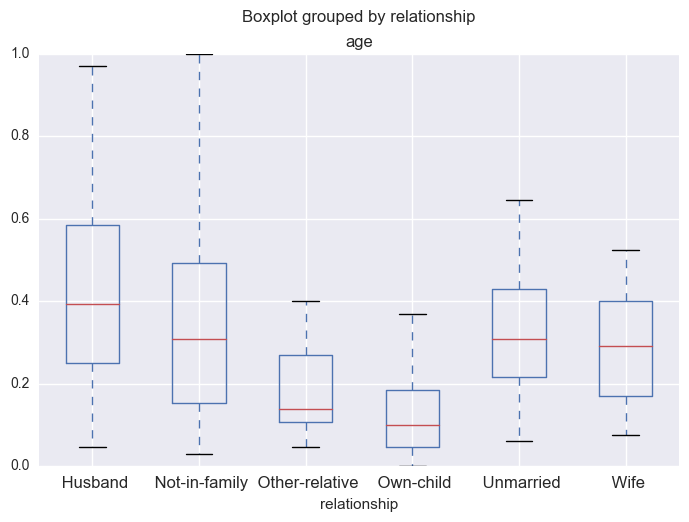

In [28]:
df.boxplot("age",by = "relationship" )

### Euclidian Distance:

In [29]:
def mdist(a,b):                                      #mdist is the function to calculate euclidian distance with L2 norm
    total = 0;
    for i in range(0,len(df_euc.keys())):
        diff = b[i] - a[i];
        total += diff * diff;
    return np.sqrt(total)

con_similarity=[]                                     #similarity for continuous variables age,fnlwgt
for i in df_euc.values:
    for j in df_euc.values:
        con_similarity.append(1/np.exp(mdist(i,j)))   # Once we have the distance d, we can calculate the similarity by 1/e^d
ar = np.array(con_similarity)                         # This is the final array which consists of 270,400 values
shape = (520,520)
ar_new = ar.reshape(shape,)                           # Arranging the 1d array to 520 x 520 matrix
ar_new.shape
df_mdist = pd.DataFrame(data=ar_new)                  # Loading these values into a dataframe

### Jaccardian Similarity Function:
* This function counts the number of (0,1), (1,0) and (1,1) given two input vectors.
* Calculates the jaccardian similarity for attributes listed in labels. Uses the jaccardian formula to get the similarity. Produces one value for all attributes in labels.

In [30]:
def jaccardian_counts(vector_1,vector_2):
    M11 = 0
    M10 = 0
    M01 = 0
    for i in range(0,len(vector_1)):
        if(vector_1[i] == 1 and vector_2[i] == 1):
            M11 = M11 + 1
        if(vector_1[i] == 1 and vector_2[i] == 0):
            M10 = M10 + 1
        if(vector_1[i] == 0 and vector_2[i] == 1):
            M01 = M01 + 1
    return M11,M10,M01

def jaccardian_sim(labels):
    delta_k = []
    jacc_sim = []
    length = 520
    for j in range(0,length):
        for k in range(0,length):
            vector_1 = []
            vector_2 = []
            for i in range(0,len(labels)):
                vector_1.append(df[labels[i]][j])
                vector_2.append(df[labels[i]][k])
            M11,M10,M01 = jaccardian_counts(vector_1,vector_2)
            delta_k.append(get_delta(vector_1,vector_2))
            if(M11+M10+M01 == 0):
                jacc_sim.append(0)
                continue
            jacc_sim.append(M11/(M10+M01+M11))
            
    ar = np.array(jacc_sim)
    shape = (length,length)
    ar_reshape = ar.reshape(shape,)
    df_sim = pd.DataFrame(data = ar_reshape)
    
    ar = np.array(delta_k)
    shape = (length,length)
    ar_reshape = ar.reshape(shape,)
    df_delta_k = pd.DataFrame(data = ar_reshape)
    return(df_sim,df_delta_k)
def get_norm(x):
    square_sum = 0
    for i in x:
        square_sum = square_sum + i * i
    return math.sqrt(square_sum)

def dot(v1, v2):
    sum_prod = 0
    for i in range(0,len(v1)):
        sum_prod = sum_prod + v1[i] * v2[i]
    return sum_prod

def cos_sim(a,b):
    dot_prod = dot(a,b)
    #print(dot_prod)
    a_norm = get_norm(a)
    b_norm = get_norm(b)
    #print(a_norm)
    if(a_norm == 0 or b_norm == 0):
        return 0
    return (dot_prod/(a_norm * b_norm))


def cosine_sim(labels):
    delta_k = []
    cosine_sim1 = []
    length = 520
    for j in range(0,length):
        for k in range(0,length):
            vector_1 = []
            vector_2 = []
            for i in range(0,len(labels)):
                vector_1.append(df[labels[i]][j])
                vector_2.append(df[labels[i]][k])
            cosine_sim1.append(cos_sim(vector_1,vector_2))
            delta_k.append(get_delta(vector_1,vector_2))
            
    ar = np.array(cosine_sim1)
    shape = (length,length)
    ar_reshape = ar.reshape(shape,)
    df_sim = pd.DataFrame(data = ar_reshape)
    
    ar = np.array(delta_k)
    shape = (length,length)
    ar_reshape = ar.reshape(shape,)
    df_delta_k = pd.DataFrame(data = ar_reshape)
    return(df_sim,df_delta_k)

### Delta:
* Given two vectors this function returns 0 if both vectors are zero vectors. Used for sparse data. Delta refers to variable delta in the general approach formula to calculate similarities.

In [31]:
def get_delta(vector_1,vector_2):
    for i in range(0,len(vector_1)):
        if(vector_1[i] == 1 or vector_2[i] == 1):
            return 1
    return 0

### Similarity function for Nominal and Ordinal:

In [32]:
def nom_sim(dframe):
    temp = []
    for i in dframe:
        for j in dframe:
            if i == j:
                a = 1
                temp.append(a)
            else:
                a = 0
                temp.append(a)        
    ar = np.array(temp)
    shape = (len(dframe), len(dframe))
    ar_reshape = ar.reshape(shape,)
    df_sim = pd.DataFrame(data = ar_reshape)
    return(df_sim)


def ord_sim(dframe):
    temp = []
    for i in dframe:
        i = i - 1
        for j in dframe:
            j = j - 1
            d = abs(i - j) / (len(dframe.unique()) - 1)
            s = temp.append(1-d)
    ar = np.array(temp)
    shape = (len(dframe), len(dframe))
    ar_reshape = ar.reshape(shape,)
    df_sim = pd.DataFrame(data = ar_reshape)
    return(df_sim)

### Average function :

* Combines similarities for different attribute types using general approach. delta_k here is the delta values of attributes for which jaccardian similarity is applied. 
* Loop iterates through all (except jaccardian) the data frames containing similarity values for which average similarity is to be calculated.
* The same is done with jaccardian, but if the two vectors are 0 (delta value for that element in df is 0) then it is not included in the average, delta_count makes sure of this.

In [33]:
def average_sim(df_list,delta_k):
    average = []
    length = 520
    for i in range(0,length):
        for j in range(0,length):
            avg = 0
            delta_count = 0
            for k in range(0,len(df_list)-1):
                avg = avg + df_list[k][i][j]
                delta_count = delta_count + 1
            k = len(df_list)-1
            if(k == len(df_list)-1):
                avg = avg + df_list[k][i][j] * delta_k[i][j]
                if(delta_k[i][j] == 1):
                    delta_count = delta_count + 1
            avg = avg / delta_count
            average.append(avg)
    
    ar = np.array(average)
    shape = (length, length)
    ar_reshape = ar.reshape(shape,)
    df_avg = pd.DataFrame(data = ar_reshape)
    return(df_avg)

* Replacing the values that are other than 0 in capital_gain and capital_loss with 1.
* This will help us to apply jaccard similarity.

In [34]:
def replace_positive_with_one(dframes):
        for i in range(0,len(dframes)):
            for j in range(0,len(df[dframes[i]])):
                if(df[dframes[i]][j] > 0):
                       df[dframes[i]][j] = 1

In [35]:
replace_dframes = ["capital_loss","capital_gain"]
replace_positive_with_one(replace_dframes)
df_jac_sim,df_delta_k = jaccardian_sim(replace_dframes)
#print(df_jac_sim)
df_edu_sim = ord_sim(df["education_cat"])
df_occu_sim = nom_sim(df["occupation"])
df_race_sim = nom_sim(df["race"])
df_country_sim = nom_sim(df["native_country"])
df_marital_sim = nom_sim(df["marital_status"])
df_gender_sim = nom_sim(df["gender"])
df_relationship_sim = nom_sim(df["relationship"])
df_list = [df_mdist,df_edu_sim,df_occu_sim,df_race_sim,df_country_sim,df_marital_sim,df_gender_sim,df_relationship_sim,df_jac_sim]
df_avg = average_sim(df_list,df_delta_k)

C:\Users\Yashwanth\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Replace Diagonal Elements:
Replace all the diagonal elements in the final similarity data frames with zero as we do not want to consider an objects similarity with itself

In [36]:
def replace_diagnol(df_avg):
    for i in range(0,520):
        df_avg[i][i] = 0
    return df_avg

df_avg = replace_diagnol(df_avg)
df_avg.head()

,0,1,2,3,4,5,6,7,8,9,...,510,511,512,513,514,515,516,517,518,519
0,0.000000,0.850129,0.227492,0.287619,0.587347,0.596392,0.585250,0.583614,0.833189,0.848425,...,0.754367,0.848569,0.544653,0.851940,0.859488,0.470925,0.308937,0.454003,0.714354,0.716592
1,0.850129,0.000000,0.231421,0.277935,0.448665,0.710661,0.464455,0.590103,0.818193,0.836727,...,0.863382,0.962641,0.658098,0.841542,0.983792,0.469899,0.297720,0.450628,0.817957,0.582361
2,0.227492,0.231421,0.000000,0.404013,0.454682,0.349283,0.475430,0.477902,0.318915,0.209293,...,0.188713,0.208477,0.286412,0.337776,0.240732,0.483932,0.310601,0.319669,0.161541,0.345331
3,0.287619,0.277935,0.404013,0.000000,0.642167,0.528739,0.275587,0.391959,0.273982,0.265677,...,0.246214,0.286843,0.226696,0.285574,0.283916,0.271885,0.494838,0.394529,0.277862,0.407210
4,0.587347,0.448665,0.454682,0.642167,0.000000,0.714783,0.568302,0.565015,0.463437,0.444516,...,0.402467,0.443815,0.447616,0.444731,0.455748,0.460391,0.430732,0.423079,0.382243,0.706636


### Parameter "k" :
* Get k similar objects for each object in the dataset. Get k largest elements and their indices using DataFrame.nlargest and DataFrame.nlargest.index function in each column (Similarity matrix is symmetric). Each column represents one object/record. Use these k values and indices to populate the final output dataframe.
* After executing this step, it will ask you to enter the value for k. 

In [37]:
def k_similar(df_avg,k):
    df_k_similar = []
    temp_indices = []
    temp_values = []
    
    for i in range(0,520):
        temp_indices = df_avg.nlargest(k,i).index
        temp_indices = [x+1 for x in temp_indices]
        temp_values = df_avg.nlargest(k,i)[i]
        t = 1       
        #df_prox = DataFrame({'Transaction ID':i+1})
        for j in temp_values:
            df_temp1 = pd.DataFrame({t:[temp_indices[t-1]]})
            df_temp2 = pd.DataFrame({'%d-prox'%t:[j]})     
            if(t == 1 ):
                df_temp3 = pd.concat([df_temp1,df_temp2],axis=1)
            else:
                df_temp3 = pd.concat([df_temp3,df_temp1,df_temp2],axis=1)
            t = t + 1
        if(i == 0):
            df_prox = df_temp3.copy()
            #print(df_prox)
        else:
            df_prox = pd.concat([df_prox,df_temp3],axis=0,ignore_index=True)
    return df_prox

k = int(input('Enter the parameter k: '))
df_prox = k_similar(df_avg,k)
df_temp = pd.DataFrame({'Transaction ID':list(range(1,521))})
df_prox = pd.concat([df_temp,df_prox],axis=1)
df_prox.to_csv("output.csv")
df_prox.head()

Enter the parameter k: 10


,Transaction ID,1,1-prox,2,2-prox,3,3-prox,4,4-prox,5,...,6,6-prox,7,7-prox,8,8-prox,9,9-prox,10,10-prox
0,1,31,0.971651,377,0.961267,258,0.954087,149,0.937537,196,...,333,0.911053,348,0.871157,338,0.865374,452,0.863633,239,0.859616
1,2,239,0.984975,515,0.983792,378,0.978131,348,0.976864,180,...,261,0.973412,47,0.972526,171,0.972370,71,0.969347,48,0.967063
2,3,498,0.725631,309,0.659580,354,0.612034,442,0.601422,321,...,153,0.597981,274,0.596224,144,0.595475,82,0.594600,473,0.592557
3,4,156,0.686017,455,0.678636,315,0.662634,200,0.658494,284,...,358,0.655211,209,0.650428,227,0.648484,374,0.647916,88,0.647595
4,5,60,0.953156,249,0.952773,138,0.948248,64,0.943915,121,...,13,0.847078,374,0.843922,200,0.843288,209,0.838125,358,0.836656


## Section - C:

### A.
* To check the distribution of each proximation, we will plot histograms. This will help us to get an idea how the data are distributed. We plotted histograms all the way upto k= 10

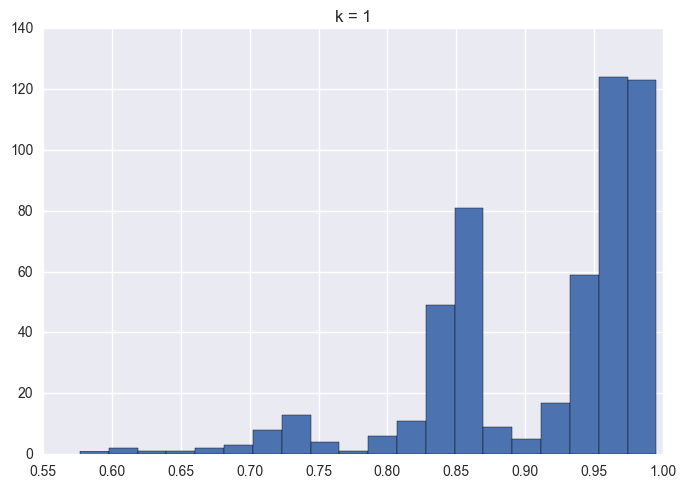

In [38]:
df_prox["1-prox"].hist(bins = 20)
plt.title('k = 1')

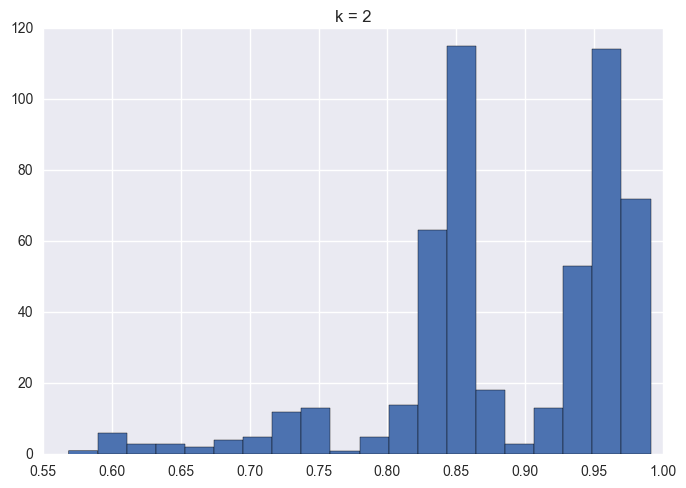

In [39]:
df_prox["2-prox"].hist(bins = 20)
plt.title('k = 2')

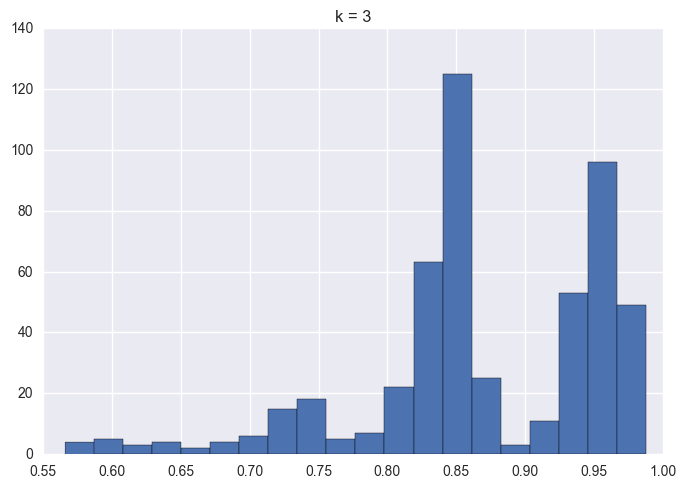

In [40]:
df_prox["3-prox"].hist(bins = 20)
plt.title('k = 3')

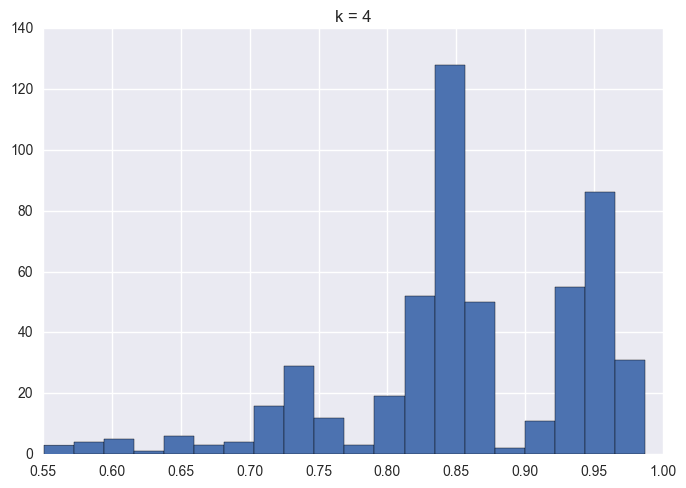

In [41]:
df_prox["4-prox"].hist(bins = 20)
plt.title('k = 4')

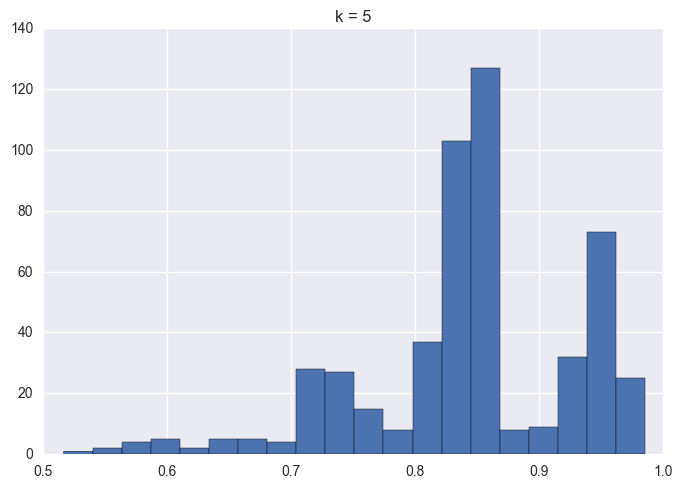

In [42]:
df_prox["5-prox"].hist(bins = 20)
plt.title('k = 5')

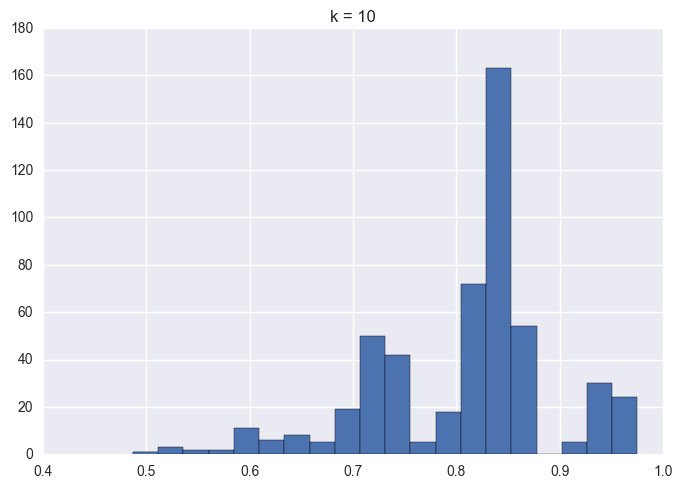

In [43]:
df_prox["10-prox"].hist(bins = 20)
plt.title('k = 10')

### B. 
* We will concatenate the class attribute with df_prox dataframe to look for any differences. 

In [44]:
df_test = pd.concat((df_prox, df["class"]), axis = 1)

* Once they are concatenated, we will see the distributions of similarities over the 2 classes.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A4A4DD8EF0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001A4A278C0B8>], dtype=object)

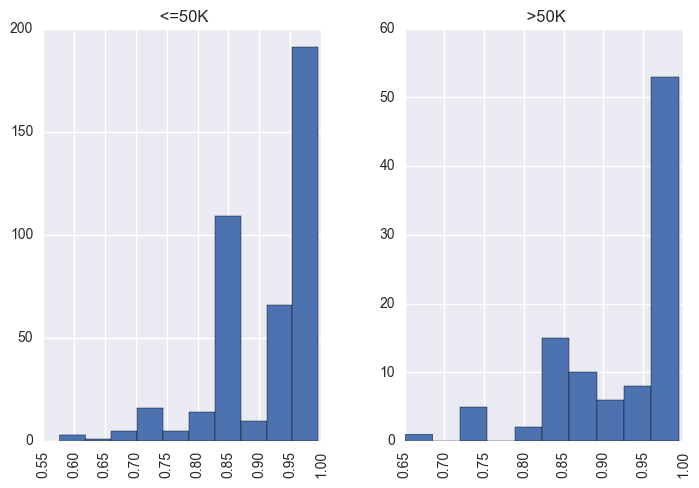

In [45]:
# K = 2
df_test["1-prox"].hist(by = df["class"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A4A19883C8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001A4A191C3C8>], dtype=object)

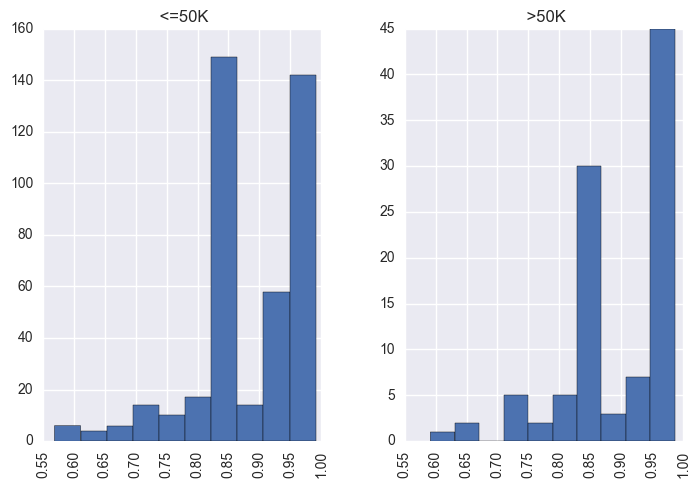

In [46]:
# K=2
df_test["2-prox"].hist(by = df["class"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A4A4F50C50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001A4A5D42588>], dtype=object)

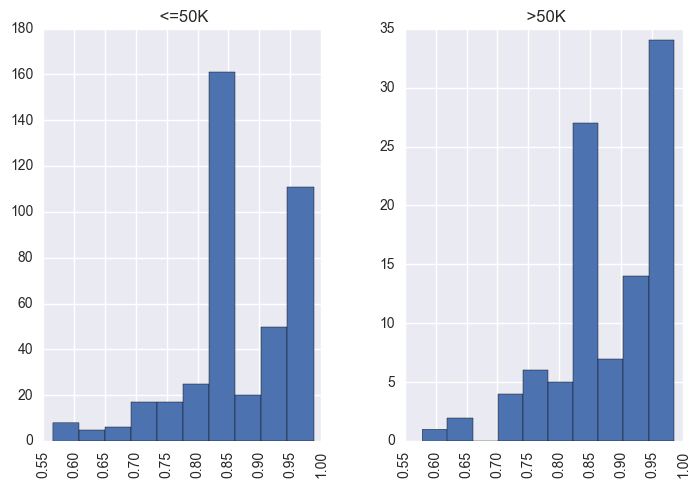

In [47]:
df_test["3-prox"].hist(by = df["class"])
# K = 3

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A4A50159B0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001A4A5080358>], dtype=object)

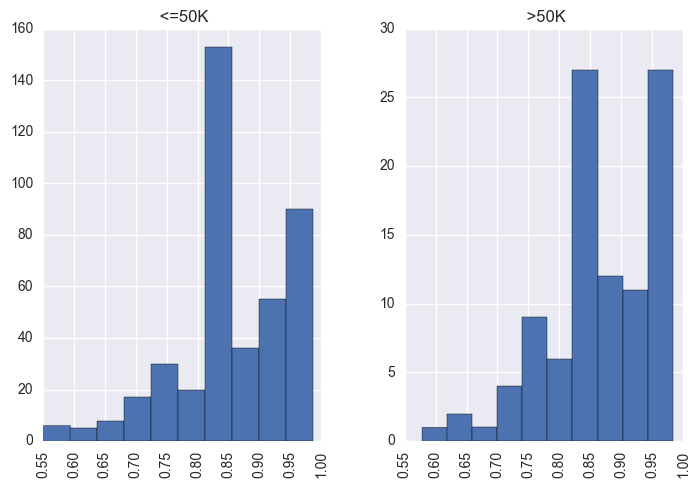

In [48]:
df_test["4-prox"].hist(by = df["class"])
# K = 4

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A4A50CE518>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001A4A5EDDE48>], dtype=object)

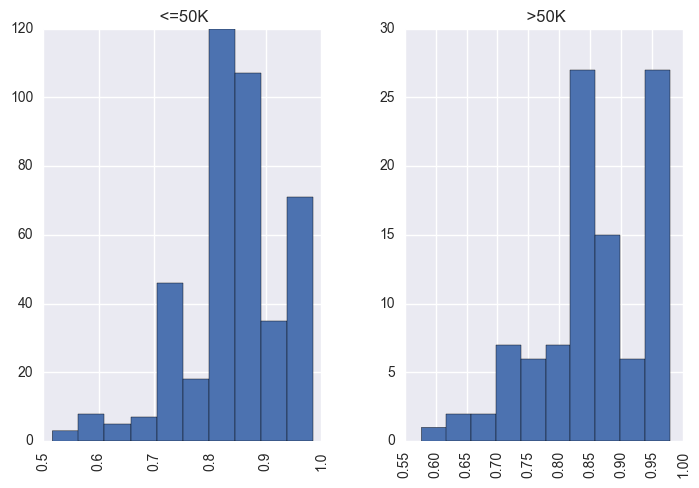

In [49]:
df_test["5-prox"].hist(by = df["class"])
# K = 5

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A4A61ED470>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001A4A5FECCC0>], dtype=object)

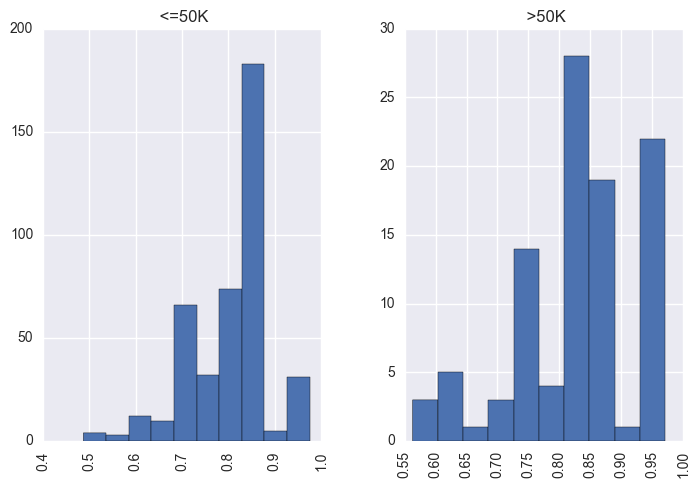

In [50]:
df_test["10-prox"].hist(by = df["class"])
# K =10

* As you can see in the graphs above, as we increased the value of k, class attribute with value <=50 tends to follow normal distribution.
* Where as the class attribute value > 50 is still very much away from normality. We can check the significance of the distribution using statistical methods.

### C. Closest to the largest number:
* This can be checked using value_counts() on k = 1, 3, 5 and 10

In [51]:
#K = 1
df_test[1].value_counts()

15     5
346    5
90     4
210    4
151    4
142    4
314    4
338    4
357    4
358    4
60     4
43     4
23     4
191    4
8      4
499    3
293    3
154    3
450    3
267    3
48     3
83     3
437    3
136    3
424    3
235    3
128    3
413    3
321    3
326    3
      ..
269    1
278    1
345    1
344    1
343    1
331    1
330    1
327    1
323    1
322    1
319    1
318    1
317    1
313    1
309    1
306    1
305    1
302    1
301    1
298    1
297    1
295    1
294    1
290    1
289    1
288    1
287    1
286    1
283    1
255    1
Name: 1, dtype: int64

* 15 is closest to few other examples.

In [52]:
#K = 3
df_test[3].value_counts()

117    6
267    6
96     5
6      5
435    5
71     5
61     5
389    5
92     4
391    4
390    4
240    4
480    4
373    4
103    4
264    4
171    4
358    4
502    4
348    4
322    4
19     4
451    4
326    4
207    3
212    3
402    3
213    3
170    3
179    3
      ..
430    1
321    1
223    1
144    1
433    1
141    1
140    1
139    1
138    1
137    1
425    1
174    1
423    1
420    1
221    1
400    1
406    1
210    1
209    1
203    1
200    1
196    1
416    1
193    1
192    1
189    1
188    1
186    1
183    1
520    1
Name: 3, dtype: int64

In [53]:
#K = 5
df_test[5].value_counts()

348    7
319    6
71     6
328    5
48     5
130    5
28     5
121    5
198    5
314    4
291    4
322    4
158    4
37     4
482    4
74     4
341    4
172    4
316    4
515    4
6      4
196    3
373    3
142    3
248    3
435    3
105    3
396    3
199    3
295    3
      ..
203    1
201    1
194    1
187    1
178    1
175    1
259    1
267    1
342    1
269    1
340    1
333    1
330    1
323    1
318    1
309    1
306    1
305    1
304    1
302    1
298    1
297    1
296    1
290    1
287    1
283    1
280    1
276    1
274    1
4      1
Name: 5, dtype: int64

In [54]:
#K = 10
df_test[10].value_counts()

261    11
223     8
457     7
512     6
456     6
437     5
368     5
346     5
341     5
191     5
146     5
23      5
48      4
90      4
469     4
179     4
354     4
217     4
126     4
433     4
409     4
8       4
514     4
131     4
163     4
378     3
47      3
43      3
213     3
374     3
       ..
185     1
184     1
182     1
262     1
273     1
325     1
304     1
324     1
321     1
318     1
315     1
314     1
313     1
312     1
310     1
307     1
306     1
303     1
279     1
302     1
297     1
296     1
295     1
294     1
293     1
292     1
291     1
285     1
284     1
1       1
Name: 10, dtype: int64

* Initially for k = 1, there are not many examples that are close to one particular example. But when we increased the k the number of examples that are closer is increasing. 